<a href="https://colab.research.google.com/github/carlomartino/764541/blob/main/Code_Group_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MACHINE LEARNING - Group 09

In [1]:
# INTRO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBClassifier

df = pd.read_csv('popularity_score_dataset.csv')

## EDA: Dropping & Encoding

Concatenate "artist" and  "track_name" columns in order to create a new column named "artist_song", then remove the duplicates based on this new column.

Move the "artist_song" column so that we have it as the first column

In [2]:
# DROPPING DUPLICATES AFTER MIXING ARTIST AND TRACK NAME
df['artist_song'] = df['artists'] + ' - ' + df['track_name']
df = df.drop_duplicates(subset='artist_song')
artist_song_col = df.pop('artist_song')
df.insert(0, 'artist_song', artist_song_col)

Drop all song with popularity score equal to zero

In [3]:
# DROPPING SONGS WITH POPULARITY = 0
df = df.drop(df[df['popularity'] == 0].index)

Drop all the column that are useless for our pourpose and remove the Nan values


In [4]:
# DROPPING USELESS COLUMNS AND NULL VALUES
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('album_name', axis=1, inplace=True)
df.drop('artists', axis=1, inplace=True)
df.drop('track_name', axis=1, inplace=True)
df.drop('track_id', axis=1, inplace=True)

df = df.dropna()

Use LabelEncoder to encode "explicit" column

In [5]:
# ENCODING THE EXPLICIT FEATURE
label = label_encoder = LabelEncoder()
df['explicit'] = label.fit_transform(df['explicit'])

Use OneHot Encoder to encode the "track_genre" column.

Note: this encoding create 114 columns, one for each genre

In [6]:
# ONE HOT ENCODING GENRES
encoder = OneHotEncoder()

# Fit and transform the categorical variable
one_hot_encoded = encoder.fit_transform(df[['track_genre']])

# Convert the sparse matrix to a DataFrame
one_hot_df = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded)

# Assign meaningful column names
one_hot_df.columns = encoder.get_feature_names_out(['track_genre'])

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, one_hot_df], axis=1)

Use OneHot Encoder to encode the "key" column

In [7]:
# ONE HOT ENCODING KEY
encoder = OneHotEncoder()

# Fit and transform the categorical variable
one_hot_encoded = encoder.fit_transform(df[['key']])

# Convert the sparse matrix to a DataFrame
one_hot_df = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded)

# Assign meaningful column names
one_hot_df.columns = encoder.get_feature_names_out(['key'])

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df_encoded, one_hot_df], axis=1)

Remove all the Nan values from the encoded dataframe

In [8]:
# remove all the columns that contain null values
df_encoded = df_encoded.dropna()

## EDA: Distribution & Correlation

Create a list containing all the features of our dataframes

In [9]:
# EXAMINING THE DISTRIBUTION OF THE DATA BY USING PLOTS
features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'explicit', 'mode']

Use the list we created to plot the distributions of each feature

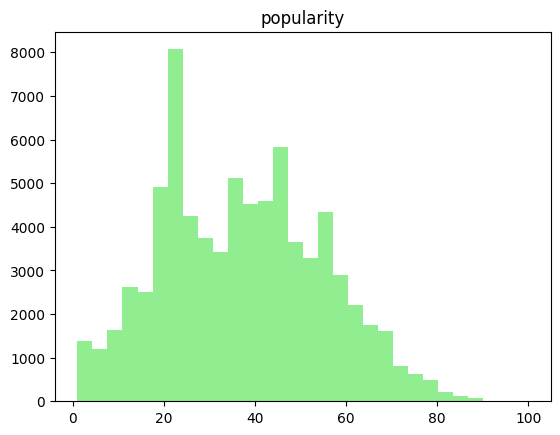

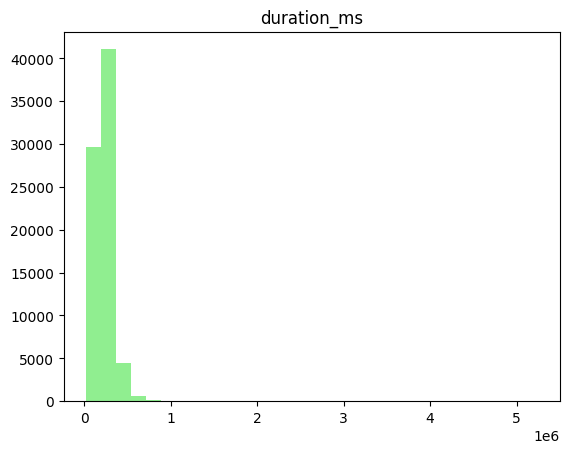

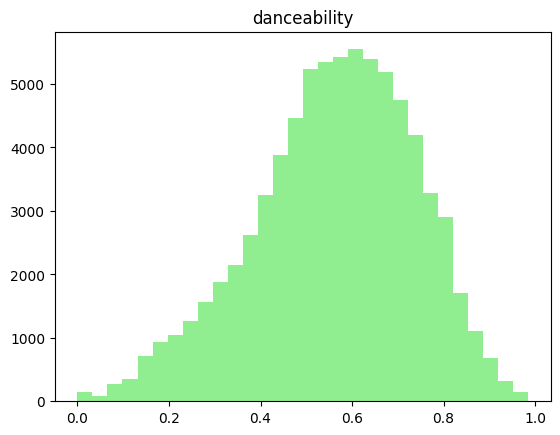

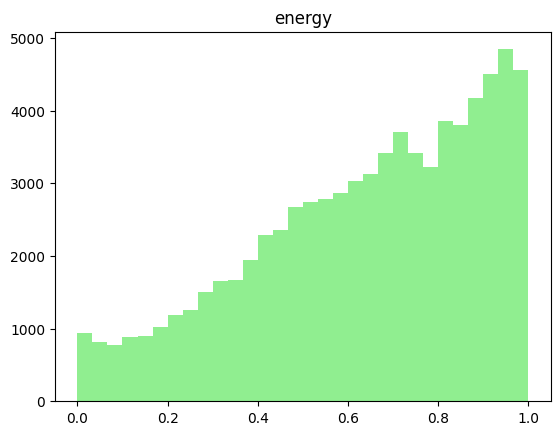

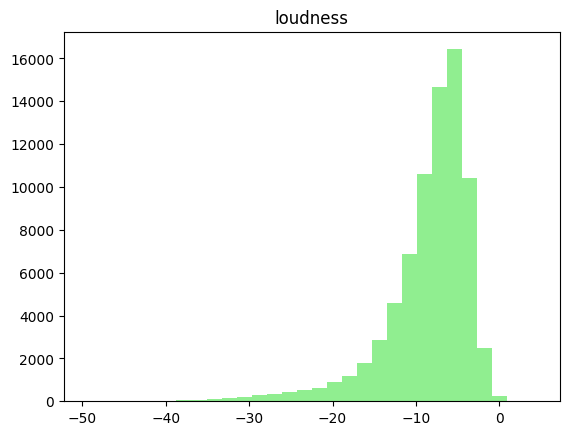

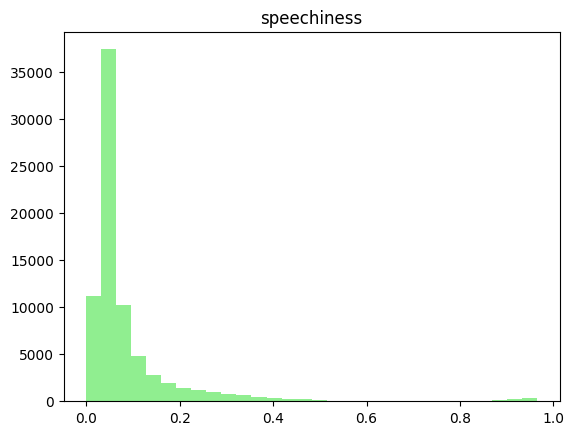

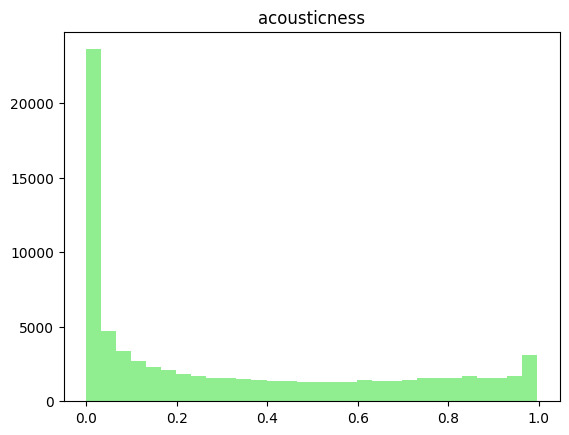

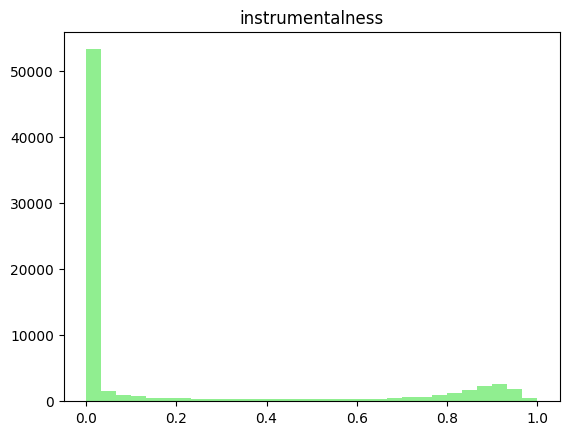

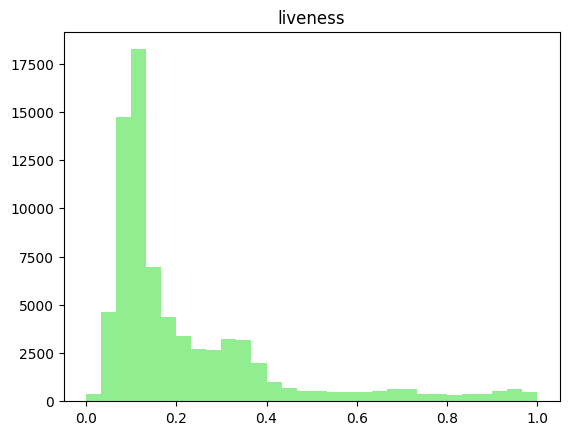

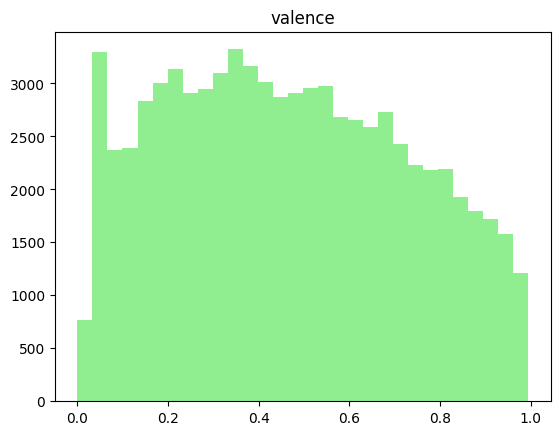

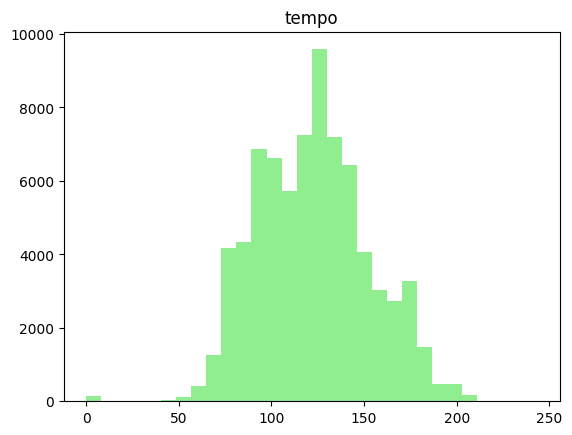

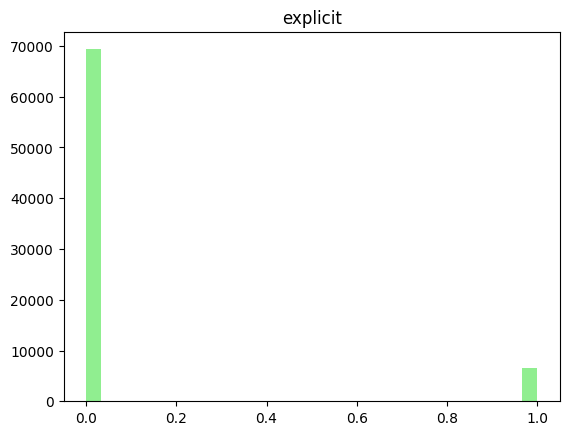

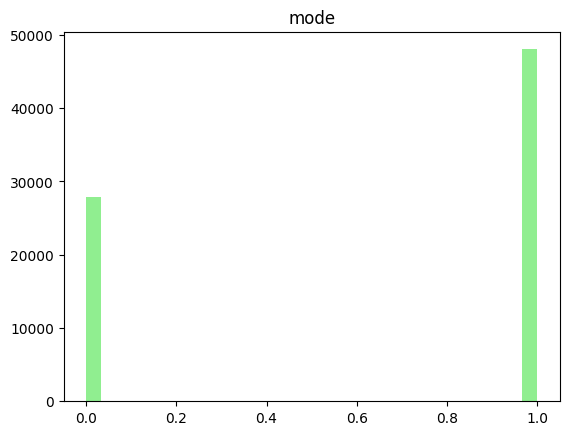

In [10]:
# HISTOGRAMS
for feature in features:
    plt.hist(df[feature], color='lightgreen', bins=30)
    plt.title(feature)
    plt.show()

Plot the boxplot of each feature of the dataframe

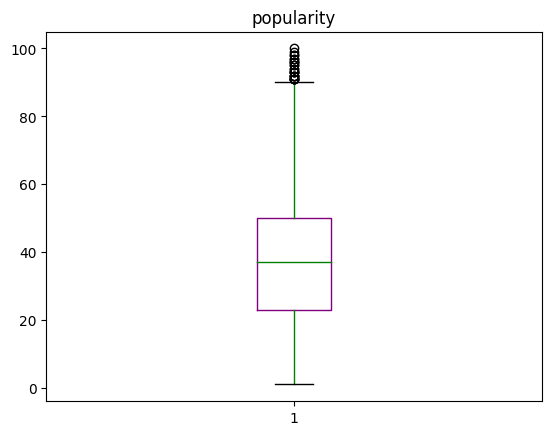

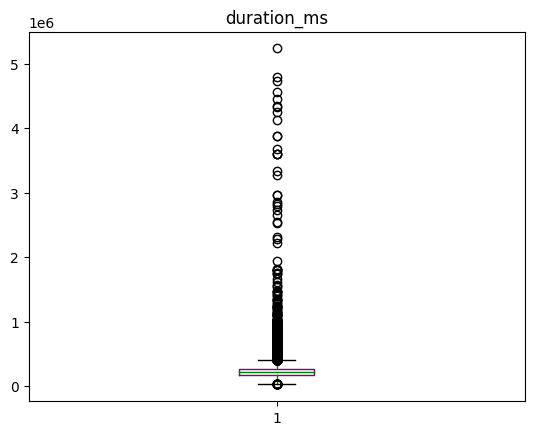

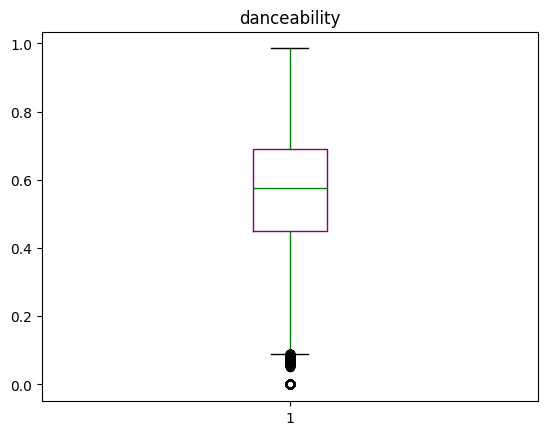

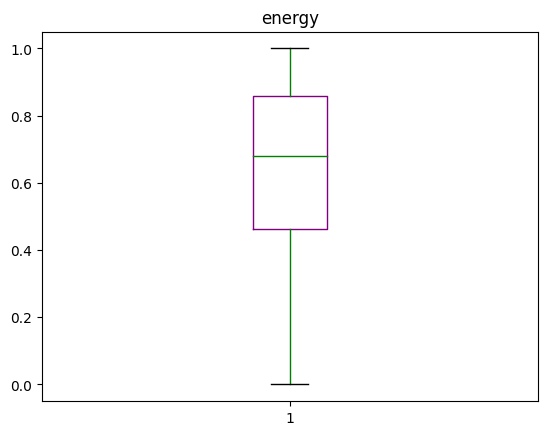

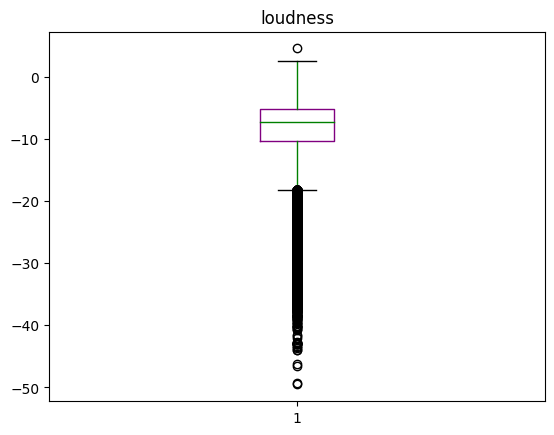

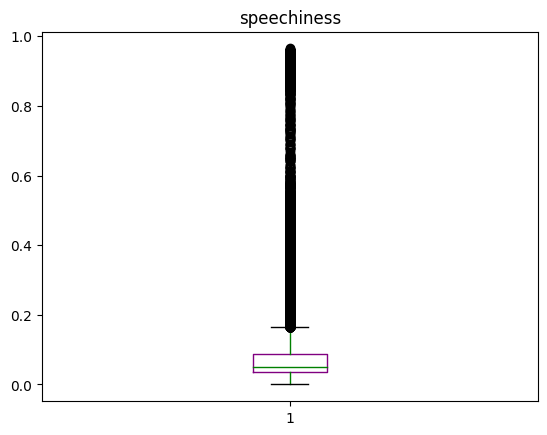

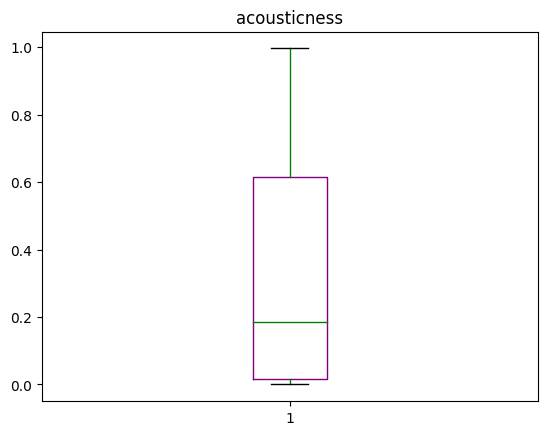

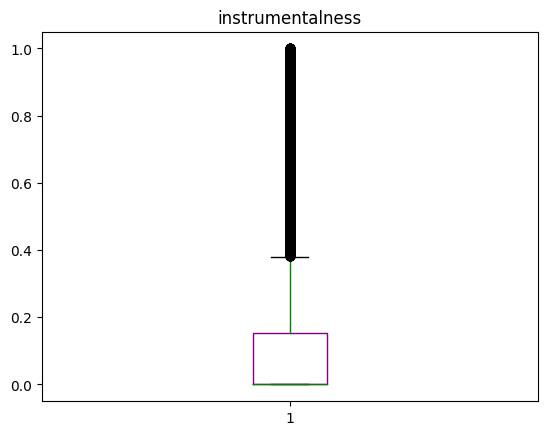

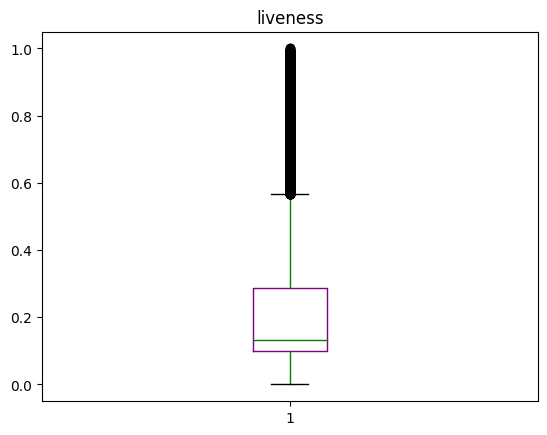

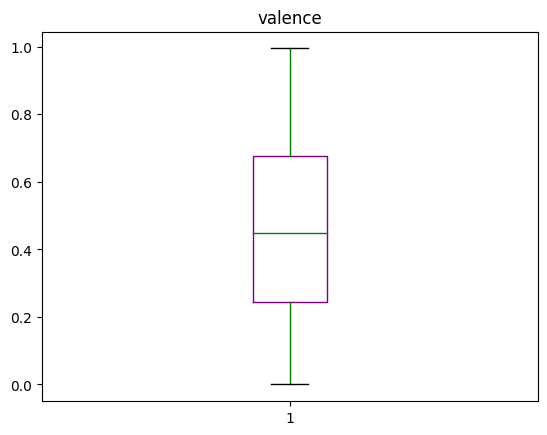

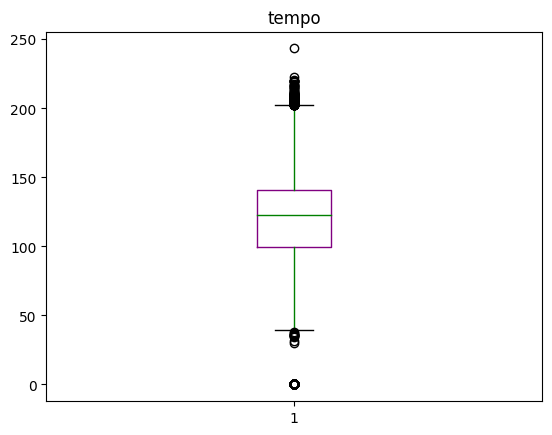

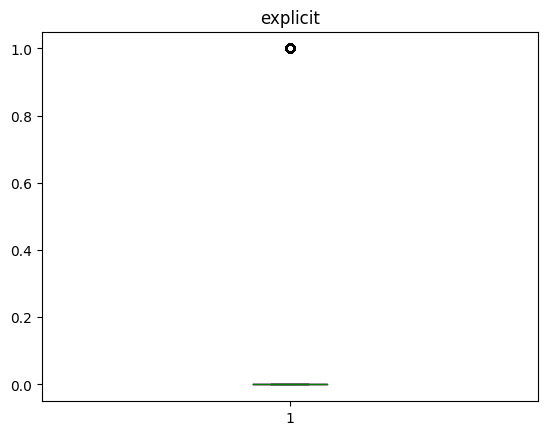

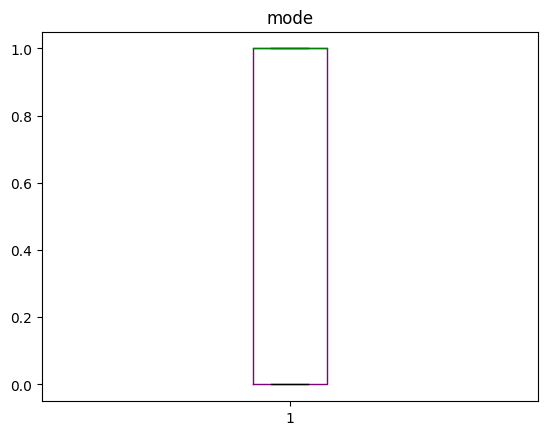

In [11]:
# BOX PLOTS
for feature in features:
    plt.boxplot(df[feature], boxprops=dict(color='purple'),
                whiskerprops=dict(color='green'),
                medianprops=dict(color='green'))
    plt.title(feature)
    plt.show()

Plot the correlation matrix in order to see the correlation between each variable of the dataframe.

Note: we are not using the encoded dataframe


<ipython-input-12-1cdae613dbcc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


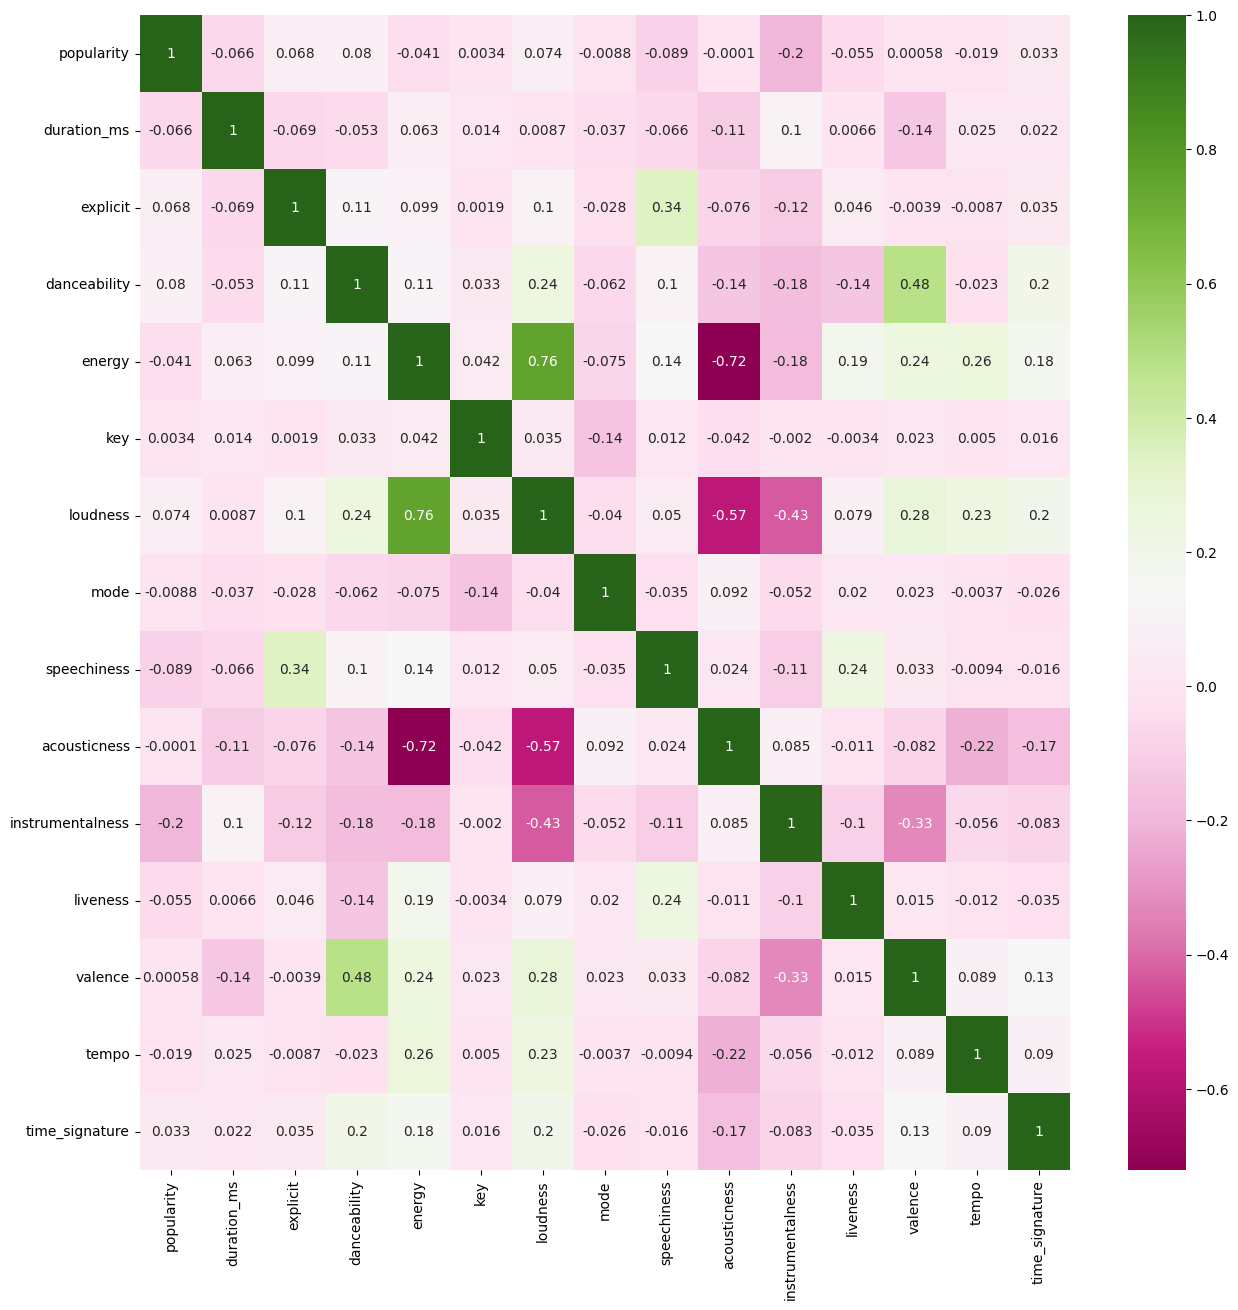

In [12]:
# INVESTIGATING THE RELATIONSHIPS BETWEEN THE FEATURES USING A CORRELATION MATRIX
corr = df.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap="PiYG", ax=ax)
plt.show()

## Clustering

Drop the "track_genre" column and extract the numerical features that we have to use for the clustering 

In [13]:
# Drop the genre column
df_no_genre = df.drop('track_genre', axis=1)

# Extract the numerical features to be used for clustering
df_num = df_no_genre[features]


Scale the numerical features and then create a new dataframe with the scaled numerical features plus the column "artist_song"

In [14]:
# Scale the numerical features
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

# Create a new DataFrame with the scaled numerical features and the artist and track title columns
df_scaled = pd.DataFrame(df_num_scaled, columns=features)
df_scaled['artist_song'] = df_no_genre['artist_song']


Perform the clustering, add the cluster labels to the dataframe and then print the centroids

In [15]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=len(df['track_genre'].unique()), random_state=0).fit(df_scaled[features])

# Add the cluster labels to the DataFrame
df_scaled['cluster'] = kmeans.labels_

# Print the cluster centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     popularity    duration_ms  danceability    energy   loudness  \
0     12.748344  226127.992274      0.792043  0.711216  -7.076740   
1     54.974273  243340.478747      0.469177  0.746019  -5.755217   
2     28.385226  207632.492454      0.442216  0.870610  -5.045878   
3     22.992925  190742.629717      0.305744  0.107362 -21.222401   
4     55.378713  215634.789604      0.578626  0.748527  -5.820569   
..          ...            ...           ...       ...        ...   
108   22.904387  234219.140607      0.450484  0.879584  -5.211416   
109   23.845663  234508.360969      0.356453  0.918093  -4.600496   
110   34.925501  211826.048711      0.497990  0.854211  -5.312553   
111   30.410714  241968.655612      0.384601  0.317142 -13.767964   
112   43.822368  422069.350877      0.696020  0.675996  -9.705329   

     speechiness  acousticness  instrumentalness  liveness   valence  \
0       0.088701      0.107074          0.028032  0.136295  0.671851   
1       0.061815      0.114

create two variables containing the predicted labels and the true labels, then use evaluate the accuracy of the clustering

In [17]:
cluster_labels = kmeans.predict(df_scaled[features])
true_labels = df['track_genre'].values

# Silhouette score
silhouette_avg = silhouette_score(df_scaled[features], cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Homogeneity score
homogeneity = homogeneity_score(true_labels, cluster_labels)
print("Homogeneity Score:", homogeneity)

Silhouette Score: 0.10470180402397798
Homogeneity Score: 0.26488848528452263


We use the PCA in order to reduce the dimenions to be able to visualize the clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


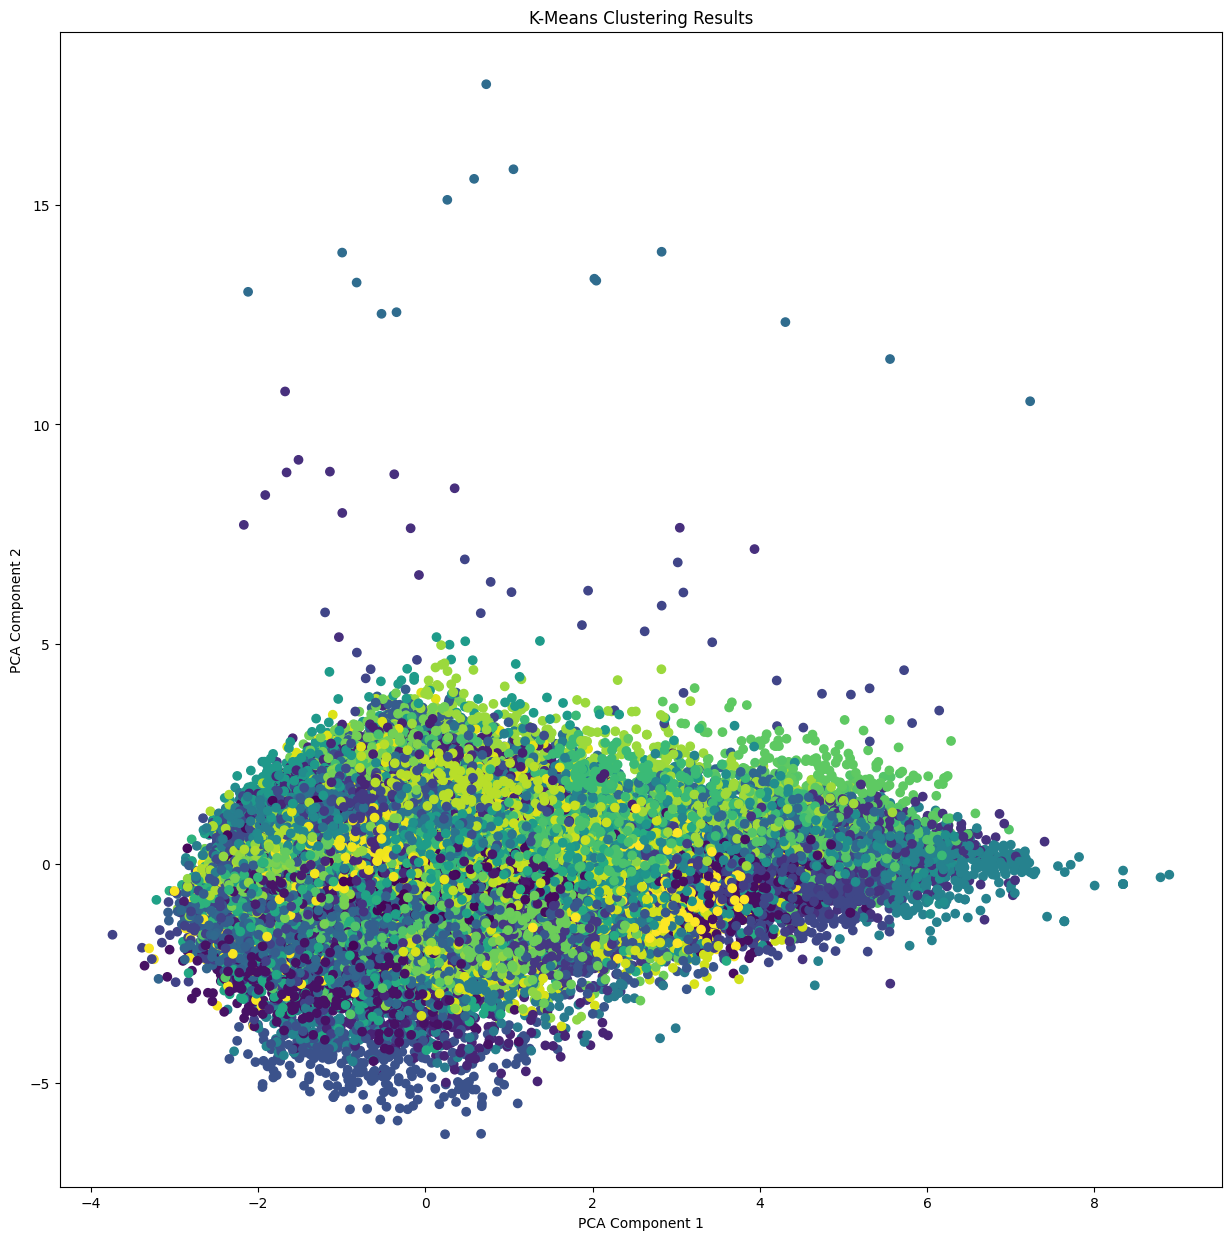

In [18]:
F = df_scaled[features]

# Select the features
clust = F.iloc[:, 1:]

# Perform clustering
kmeans = KMeans(n_clusters=113, random_state=42).fit(clust)

# Reduce the number of dimensions to 2 using PCA
pca = PCA(n_components=2)
clust_pca = pca.fit_transform(clust)

# Set the size of the figure
plt.figure(figsize=(15, 15))

# Plot the clusters
plt.scatter(clust_pca[:, 0], clust_pca[:, 1], c=kmeans.labels_)

# Set the labels for the plot
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results')

# Show the plot
plt.show()

## Regression

Define the features and the target variable 

In [19]:
X = df_encoded.drop(['popularity', 'artist_song', 'track_genre'], axis=1)
y = df_encoded['popularity']

Split into train e test set




In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Scale the features

In [21]:
# SCALING FEATURES
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Make a simple Linear Regression that is gonna be our baseline and then evaluete its performance

In [ ]:
# LINEAR REGRESSION
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_r2 = r2_score(y_test, lr_pred)
print('Linear Regression R2 score:', lr_r2)

Try Random Forest regressor and see its performance

In [ ]:
# RANDOM FOREST
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_r2 = r2_score(y_test, rf_pred)
print('Random Forest R2 score:', rf_r2)

Try XGboost Regressor and see its performance

In [22]:
# XGBOOST
import xgboost as xgb
from xgboost import XGBRegressor

# Create an XGBoost regressor
xgb_model = xgb.XGBRegressor()
# fit
xgb_model = xgb_model.fit(X_train,  y_train)
# predict
XGB_pred = xgb_model.predict(X_test)
# calculate evaluation metrics
XGB_r2 = r2_score(y_test, XGB_pred)
print('R-squared:', XGB_r2)

R-squared: 0.5128933320019397


**FINAL REGRESSION MODEL**

XGBoost regressor has the best r2 score so we are going to perform a grid search in order to improve its performance

In [23]:
# XGBOOST WITH GRID SEARCH
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}
# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best parameters to build the final model
final_model = xgb.XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# Make predictions on the test set
XGB_GRID_pred = final_model.predict(X_test)

# calculate evaluation metrics
XGB_GRID_r2 = r2_score(y_test, XGB_GRID_pred)
print('R-squared:', XGB_GRID_r2)

KeyboardInterrupt: ignored

## Classification

Create another column named "popularity_class" based on the value of "popularity" column.

In this way we create four different classes of popularity and we are going to try to make predictions on the classes.

In [ ]:
# Define the target variable as popularity class
df_encoded['popularity_class'] = pd.qcut(df_encoded['popularity'], q=4, labels=False)

Split into train e test set and scale the features with MinMax Scaler



In [ ]:
# Split into train and test sets
X = df_encoded.drop(['popularity', 'popularity_class', 'artist_song', 'track_genre'], axis=1)
y = df_encoded['popularity_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Initialize the Random Forest Classifier and evalutate its performance

In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred, average='weighted')
f1 = f1_score(y_test, rf_pred, average='weighted')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('F1-score:', f1)

Initialize the XGBoost Classifier and evalutate its performance

In [ ]:
# Define your XGBoost classifier
xgb_classifier = XGBClassifier()

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
xgb_pred = xgb_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, xgb_pred)
precision = precision_score(y_test, xgb_pred, average='weighted')
f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('F1-score:', f1)

Due to the fact that the Random Forest Classifier has slightly better scores we use the grid search in order to improve its performance

In [ ]:
# Define your Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best model and best hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

rf_pred = best_model.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred, average='weighted')
f1 = f1_score(y_test, rf_pred, average='weighted')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('F1-score:', f1)

## Confusion Matrix

Calculate and then plot the confusion matrix to better understand how the model predicted

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)

## Final Considerations


Merge the test set with the predicions that we made, then we retrive the name of the song using the index to see the charateristics of the song with the highest predicted popularity

In [ ]:
#store the predictions in a new column of the test set
X_test['predictions'] = XGB_grid_pred

#select only the columns that we need
X_test_modified = X_test[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence','tempo','time_signature','predictions']]

#merge based on the index
X_test_final = X_test_modified.sort_values(by = 'predictions',  ascending=False)

#store the top 20
top_20 = X_test_final.head(20)